Alberto Trashaj N°0001075402
#### Homework_2 point a

Let's import the libraries

In [1]:
import statistics
import math
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, t
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf

In [2]:
n = 300 

Estimate the white noises processes


In [3]:
sigma_eta = 1
sigma_epsilon = 1
sigma_xi = 1

eta = np.random.normal(0, sigma_eta, n)
epsilon = np.random.normal(0, sigma_epsilon, n)
xi = np.random.normal(0, sigma_xi, n)


In [4]:
## estimating the LLT

mu = np.zeros(n)   
beta = np.zeros(n)   
y = np.zeros(n)

for t in range(n-1):
    beta[t+1] = beta[t] + xi[t]
    mu[t+1] = beta[t] + mu[t] + eta[t]
    y[t+1] = mu[t+1] + epsilon[t+1]


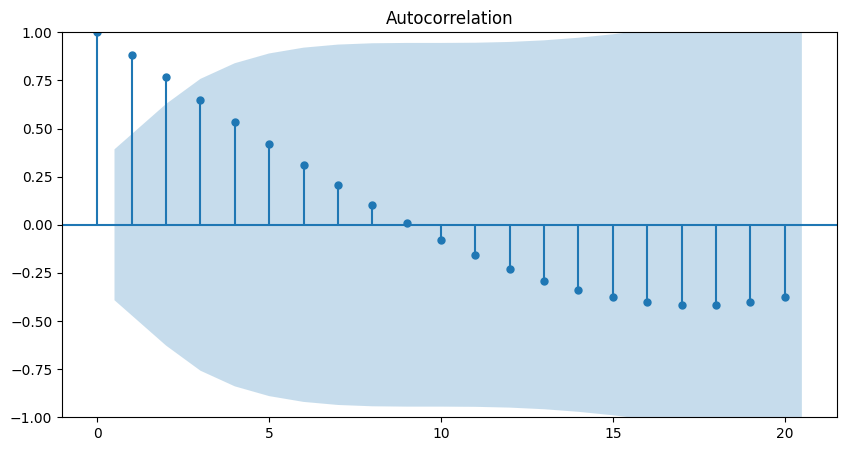

In [5]:
acf_vals = sm.tsa.acf(y)
fig, ax = plt.subplots(figsize=(10, 5))
plot_acf(acf_vals, ax=ax, lags=20)
plt.show()


Text(0, 0.5, 'Y Value')

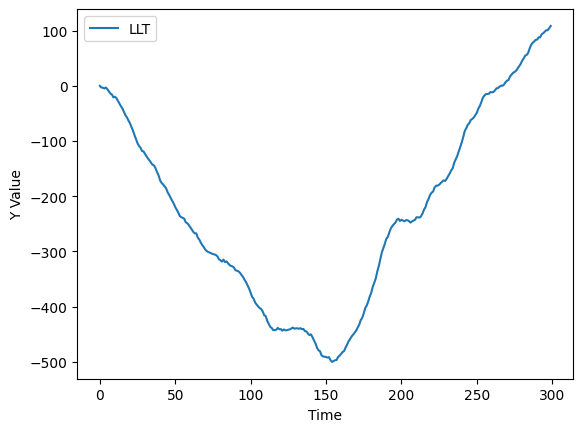

In [6]:
plt.plot(y, label='LLT')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Y Value')

## estimating the second order difference of y_t

In [7]:
d2yt = np.zeros(n)

for k in range(n-1):
    d2yt[k+1] = eta[k-2] - xi[k-2] + xi[k-1] + epsilon[k]

statistics.mean(d2yt) 


0.034823060986344086

Text(0, 0.5, 'Y Value')

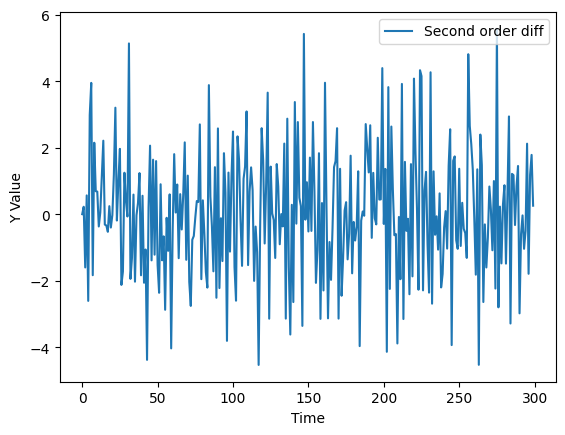

In [8]:
plt.plot(d2yt, label='Second order diff')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Y Value')

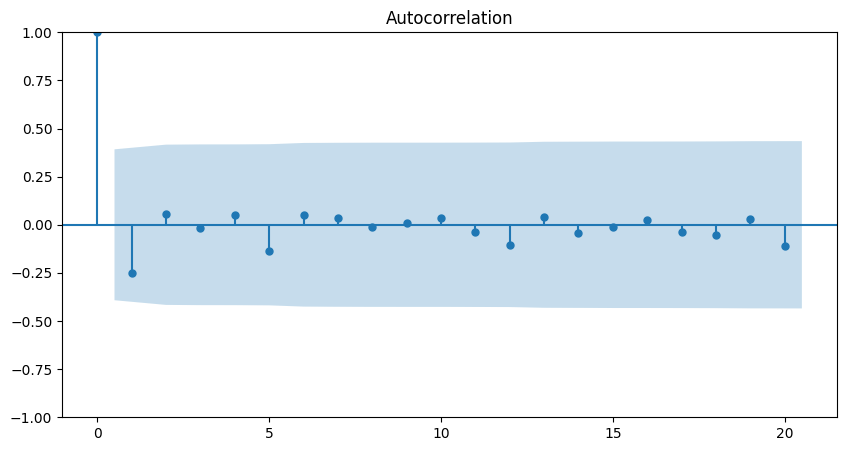

In [9]:
acf_vals = sm.tsa.acf(d2yt)
fig, ax = plt.subplots(figsize=(10, 5))
plot_acf(acf_vals, ax=ax, lags=20)
plt.show()

#### Point b
Simulate an AR(1) + noise process:
        $y_t = \mu_t + \epsilon_t$ and 
        $\mu_{t+1} = \phi \mu_t + \eta_t $
        with $\phi = 0.8$

In [10]:
phi = 0.8
mu = np.zeros(n)
y_t = np.zeros(n)

for i in range(n-1):
    mu[i+1] = phi*mu[i] + eta[i]
    y_t[i] = mu[i] + epsilon[i]

Plot of the process 

Text(0, 0.5, 'y_t Value')

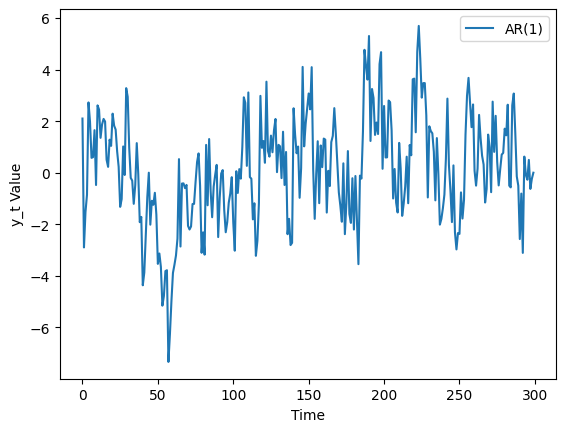

In [11]:
plt.plot(y_t, label='AR(1)')
plt.legend()
plt.xlabel('Time')
plt.ylabel('y_t Value')

Let's compute the autocorrelation function and plot it

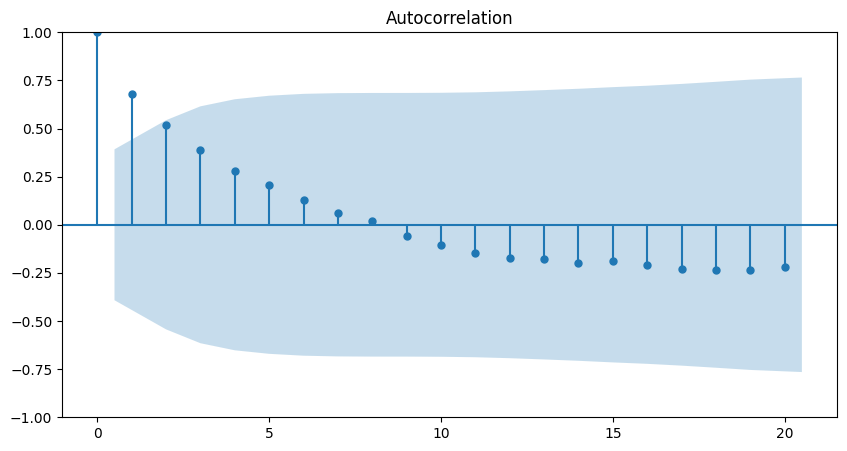

In [12]:
acf_vals = sm.tsa.acf(y_t)
fig, ax = plt.subplots(figsize=(10, 5))
plot_acf(acf_vals, ax=ax, lags=20)
plt.show()